# Quartic modes

We intend to show that the potential energy between two barely touching ellipsoids scale quartically with the rotation angle when these are rotated, _i.e._
$$
V \propto \theta^4.
$$

We first import useful libraries, where [ellipsoids](ellipsoids.py) is a custom library.

In [91]:
from ellipsoids import Ellipsoid, EllipsoidCouple, Quaternion

import numpy as np
from copy import deepcopy as copy
import matplotlib.pyplot as plt

We wish to start from 2 spheroids with a long axis of length 1 along $x$, with aspect ratio $\alpha$, and which are touching uniquely at $(0, 0, 0)$.

In [3]:
def adjacentEllipsoids(alpha):
    """
    Returns 2 spheroids with long axis of length 1 along x, with aspect ration alpha,
    and touching at (0, 0, 0).
    """
    
    R = (1, 1/alpha, 1/alpha) # semi-axes
    q = (1, 0, 0, 0) # quaternion
    
    r1 = (0, -1./alpha, 0) # position of first ellipsoid
    r2 = (0, 1./alpha, 0) # position of second ellipsoid
    
    return Ellipsoid(*r1, *q, *R), Ellipsoid(*r2, *q, *R)

We choose a few different aspect ratio $\alpha$,

In [81]:
alphas = [1.001, 1.01, 1.1, 2]

and the different angles $\theta$ we wish to rotate the first ellispoid respectively to axis $z$.

In [56]:
log_angle_i = -10
log_angle_f = 0
n_angle = 100

angles = 10**np.linspace(log_angle_i, log_angle_f, n_angle)

We compute the rescaling factor $\mu$ for each aspect ratio $\alpha$ and each angle $\theta$.

In [74]:
mu = {}
for alpha in alphas:
    ellipsoid1, ellipsoid2 = adjacentEllipsoids(alpha)
    mu[alpha] = np.array(list(map(
        lambda angle:
            EllipsoidCouple(
                copy(ellipsoid1).rotate((0, 0, 1), angle),
                ellipsoid2
            ).mu(),
        angles)))

And then associate to each rescaling factor $\mu$ the corresponding potential
$$
V = \frac{1}{2} k_e (1 - \mu)^2,
$$
where we take $k_e = 1$ for convenience.

In [75]:
V = {}
for alpha in alphas:
    V[alpha] = 0.5*((1. - mu[alpha])**2)

We finally plot the resulting curves.

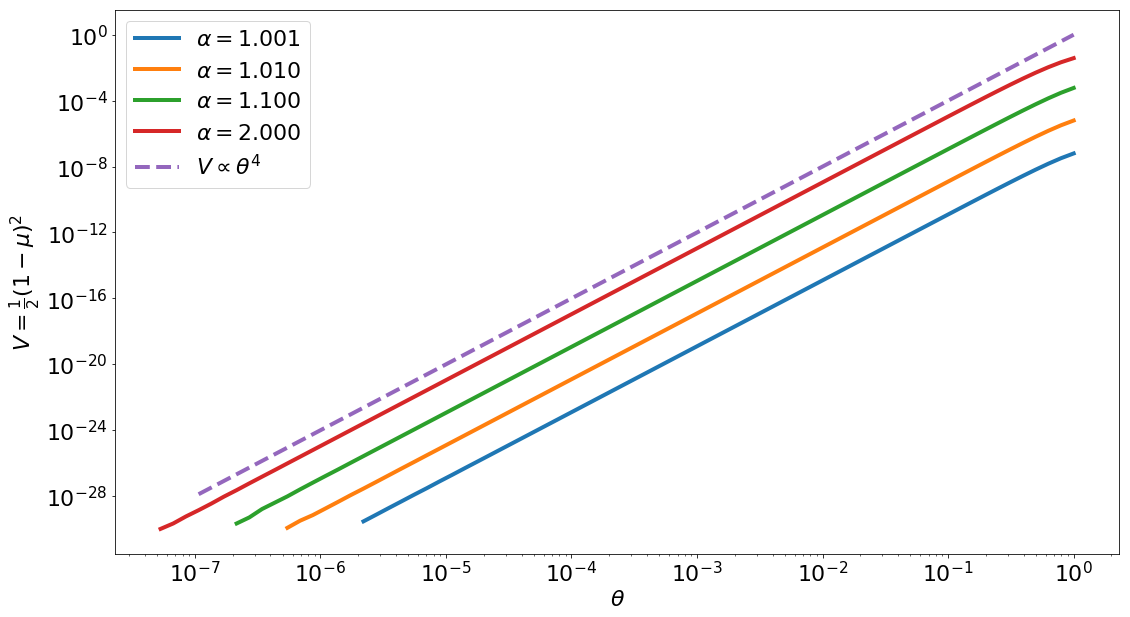

In [92]:
fig = plt.figure(figsize=(18, 10))
plt.rcParams.update({'font.size': 22})
ax = fig.subplots()
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$V = \frac{1}{2} (1 - \mu)^2$')

for alpha in alphas:
    ax.loglog(angles[V[alpha] > 1e-30], V[alpha][V[alpha] > 1e-30], linewidth=4, label=r'$\alpha = %1.3f$' % alpha) # V(\theta)

ax.loglog(angles[angles > 1e-7], angles[angles > 1e-7]**4, linestyle='--', linewidth=4, label=r'$V \propto \theta^4$') # scaling line

ax.legend()

We can confirm graphically the scaling
$$
V \propto \theta^4.
$$